In [179]:
import pandas as pd
import seaborn as snsj
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [180]:
csv_name = '20C-60A-20R.csv'

In [181]:
df = pd.read_csv(csv_name)


df16 = df[df['Name'] == 'splitOrderHash_MaxLoad_16']
df16r = df[df['Name'] == 'Refinable16']
df1c = df[df['Name'] == 'concHashMap']
df1cs = df[df['Name'] == 'concSkipListSet']
dataframes = [df16, df16r, df1c, df1cs]

In [182]:
#create new dataframes so that all ops/per columns averaged per each Thread. Less jagged lines. 
# PANDAS DOES THIS FOR US IF WE HAVE DUPLICATE VALUES AND OFFERS CONF INTERVAL
# do this type conversion and should be all set
for df in dataframes:
    df['Threads'] = df['Threads'].astype(float)
    df['OperationsPerMilliSecond'] = df['OperationsPerMilliSecond'].astype(float)
    df['LogOperationsPerMilliSecond'] = df['LogOperationsPerMilliSecond'].astype(float)


'''
NUM_THREADS = 32
new_df = []

for df in dataframes:
    for t in range(1,NUM_THREADS):
        
        indices_to_average_then_remove = df[df['Threads'].astype(int) == t].index.tolist()
        
        #print(indices_to_average_then_remove)
        save_for_later = df[df['Threads'].astype(int) == t].loc[indices_to_average_then_remove[0],:]
        #print(save_for_later)
        average_t = \
            df.loc[indices_to_average_then_remove, ['OperationsPerMilliSecond']].astype(float).mean().item()
        average_lt = \
            df.loc[indices_to_average_then_remove, ['LogOperationsPerMilliSecond']].astype(float).mean().item()
        #print(average_t)
        
        # drop what we just averaged
        df.drop(df.loc[indices_to_average_then_remove,:].index, axis=0, inplace=True)
        #print(df)[]
        df['Threads'] = df['Threads'].astype(float)

        df['OperationsPerMilliSecond'] = df['OperationsPerMilliSecond'].astype(float)
        df['LogOperationsPerMilliSecond'] = df['LogOperationsPerMilliSecond'].astype(float)

        save_for_later['OperationsPerMilliSecond'] = average_t
        save_for_later['LogOperationsPerMilliSecond'] = average_lt
        #print(save_for_later)
        #add back in what we averaged on a single line
        df=df.append(save_for_later)
    new_df.append(df)
        '''
        



"\nNUM_THREADS = 32\nnew_df = []\n\nfor df in dataframes:\n    for t in range(1,NUM_THREADS):\n        \n        indices_to_average_then_remove = df[df['Threads'].astype(int) == t].index.tolist()\n        \n        #print(indices_to_average_then_remove)\n        save_for_later = df[df['Threads'].astype(int) == t].loc[indices_to_average_then_remove[0],:]\n        #print(save_for_later)\n        average_t =             df.loc[indices_to_average_then_remove, ['OperationsPerMilliSecond']].astype(float).mean().item()\n        average_lt =             df.loc[indices_to_average_then_remove, ['LogOperationsPerMilliSecond']].astype(float).mean().item()\n        #print(average_t)\n        \n        # drop what we just averaged\n        df.drop(df.loc[indices_to_average_then_remove,:].index, axis=0, inplace=True)\n        #print(df)[]\n        df['Threads'] = df['Threads'].astype(float)\n\n        df['OperationsPerMilliSecond'] = df['OperationsPerMilliSecond'].astype(float)\n        df['LogOperat

In [183]:
new_df

[   num_map                       Name  Threads  OperationsPerMilliSecond  \
 0        0  splitOrderHash_MaxLoad_16      1.0              1.189949e+06   
 1        0  splitOrderHash_MaxLoad_16      2.0              7.581156e+05   
 2        0  splitOrderHash_MaxLoad_16      3.0              4.413618e+05   
 3        0  splitOrderHash_MaxLoad_16      4.0              3.794556e+05   
 4        0  splitOrderHash_MaxLoad_16      5.0              3.029408e+05   
 5        0  splitOrderHash_MaxLoad_16      6.0              2.806658e+05   
 6        0  splitOrderHash_MaxLoad_16      7.0              2.123975e+05   
 7        0  splitOrderHash_MaxLoad_16      8.0              2.020652e+05   
 8        0  splitOrderHash_MaxLoad_16      9.0              1.711448e+05   
 9        0  splitOrderHash_MaxLoad_16     10.0              1.626334e+05   
 10       0  splitOrderHash_MaxLoad_16     11.0              9.156144e+04   
 11       0  splitOrderHash_MaxLoad_16     12.0              9.444531e+04   

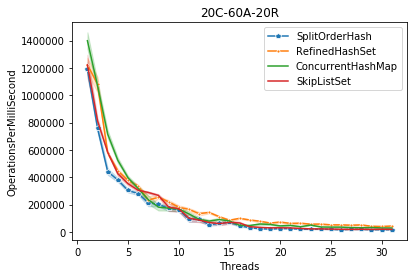

In [184]:
import seaborn as sns
palette = sns.color_palette('tab10', 5)

fig, axs = plt.subplots(ncols=1)
sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='p',data=df16,ax=axs, ci=99 , color=palette[0])


sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='.',data=df16r,ax=axs, ci=99 , color=palette[1])
sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='',data=df1c,ax=axs, ci=99 , color=palette[2])
sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='',data=df1cs,ax=axs, ci=99 , color=palette[3])


#sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='+',data=df1c,ax=axs, ci=99, color='black')
#sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='+',data=df1cs,ax=axs, ci=99, color='black')


plt.title(csv_name[0:-4])


#axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

#axs.fill_between(x=df_LP["step"], y1=df_LP["reward"] + df_LP["reward_se"],y2=df_LP["reward"] - df_LP["reward_se"], alpha=.5)
axs.legend(['SplitOrderHash', 'RefinedHashSet', 'ConcurrentHashMap', 'SkipListSet'], loc=1)


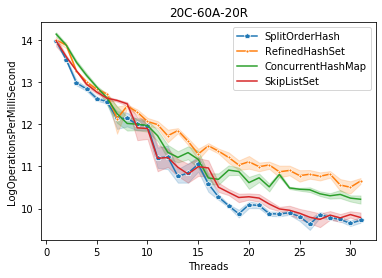

In [185]:

palette = sns.color_palette('tab10', 5)

fig, axs = plt.subplots(ncols=1)
sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='p',data=df16,ax=axs, ci=99.5 , color=palette[0])


sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='.',data=df16r,ax=axs, ci=99.5 , color=palette[1])
sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1c,ax=axs, ci=99.5 , color=palette[2])
sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1cs,ax=axs, ci=99.5 , color=palette[3])


plt.title(csv_name[0:-4])


#axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

#axs.fill_between(x=df_LP["step"], y1=df_LP["reward"] + df_LP["reward_se"],y2=df_LP["reward"] - df_LP["reward_se"], alpha=.5)
axs.legend(['SplitOrderHash', 'RefinedHashSet', 'ConcurrentHashMap', 'SkipListSet'], loc=1)



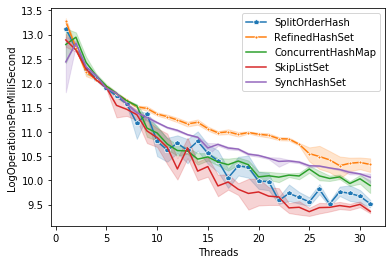

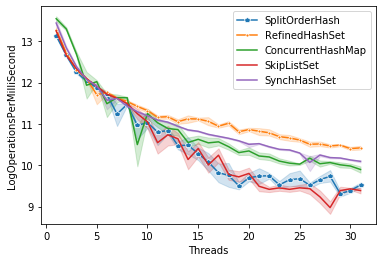

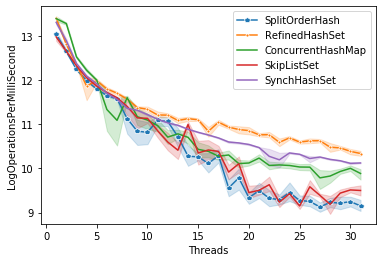

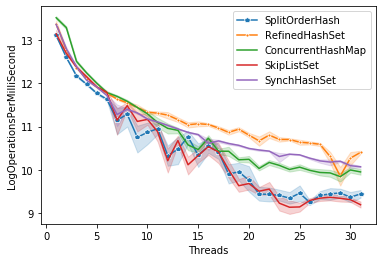

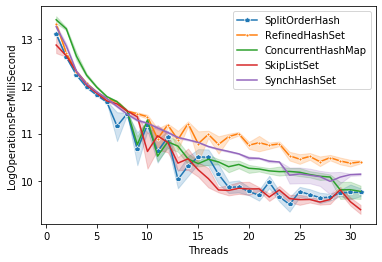

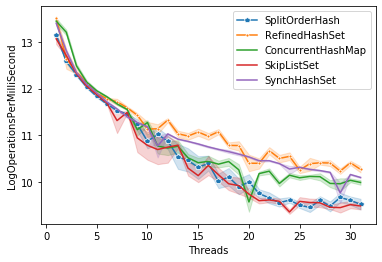

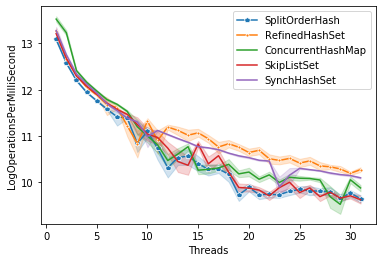

In [205]:
CASS_CLUSTER=True

if CASS_CLUSTER:
    csv_names = ['cass2/thirdsDist.csv',
                 'cass2/20C-40A-40R.csv', 
                 'cass2/10C-45A-45R.csv', 
                 'cass2/2C-49A-49R.csv', 
                 'cass2/40C-40A-20R.csv', 
                 'cass2/20C-60A-20R.csv', 
                 'cass2/10C-80A-10R.csv']
else:
    csv_names = ['thirdsDist.csv','20C-40A-40R.csv', '10C-45A-45R.csv', 
                 '2C-49A-49R.csv', '40C-40A-20R.csv', '20C-60A-20R.csv', 
                 '10C-80A-10R.csv']


for csv_name in csv_names:
    df = pd.read_csv(csv_name)
    df16 = df[df['Name'] == 'splitOrderHash_MaxLoad_16']
    df16r = df[df['Name'] == 'Refinable16']
    df1c = df[df['Name'] == 'concHashMap']
    df1cs = df[df['Name'] == 'concSkipListSet']
    df1sh = df[df['Name'] == 'syncHashSet']

    dataframes = [df16, df16r, df1c, df1cs, df1sh]
    for df in dataframes:
        df['Threads'] = df['Threads'].astype(float)
        df['OperationsPerMilliSecond'] = df['OperationsPerMilliSecond'].astype(float)
        df['LogOperationsPerMilliSecond'] = df['LogOperationsPerMilliSecond'].astype(float)
        
    
    palette = sns.color_palette('tab10', 5)

    fig, axs = plt.subplots(ncols=1)
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='p',data=df16,ax=axs, ci=99.5 , color=palette[0])


    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='.',data=df16r,ax=axs, ci=99.5 , color=palette[1])
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1c,ax=axs, ci=99.5 , color=palette[2])
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1cs,ax=axs, ci=99.5 , color=palette[3])
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1sh,ax=axs, ci=99.5 , color=palette[4])


    #plt.title(csv_name[0:-4])


    #axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

    #axs.fill_between(x=df_LP["step"], y1=df_LP["reward"] + df_LP["reward_se"],y2=df_LP["reward"] - df_LP["reward_se"], alpha=.5)
    axs.legend(['SplitOrderHash', 'RefinedHashSet', 'ConcurrentHashMap', 'SkipListSet', 'SynchHashSet'], loc=1)
    plt.savefig('figs/' + csv_name[0:-4] + '.png')

    


In [203]:
df1

NameError: name 'df1' is not defined